In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Install MiniSOM
# https://github.com/JustGlowing/minisom 
!pip install minisom

  Running setup.py bdist_wheel for minisom ... done
  Stored in directory: /home/rafael/.cache/pip/wheels/35/15/5a/79c96c035070cb325ae0d6d67a98716999c5a630d3e13617f6
Successfully built minisom
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
alunos = pd.read_csv("data/output/resultado_materias_geral.csv")

In [3]:
alunos.head()

,discente,periodoano,media_c1,faltas_c1,media_pre,faltas_pre,media_vga,faltas_vga,descricao_c3
0,3d688dbe74a84992ce43181e08c0f295,20151,0.0,0.0,0.0,66.0,0.1,30.0,NÃO PRESENTE
1,6c4acceb9b1288b61d893dc1b5005764,20151,0.0,0.0,5.3,16.0,3.1,0.0,NÃO PRESENTE
2,bb67c2ca87d0e1fcf027b2f0f6df4221,20151,8.5,0.0,9.7,16.0,6.3,0.0,NÃO PRESENTE
3,9897eefc366f1f546e5340390c3df0cd,20151,1.3,0.0,5.0,14.0,1.2,0.0,NÃO PRESENTE
4,859abe9fcb5769f73f54cba6592b81af,20151,1.7,0.0,5.3,2.0,1.3,0.0,NÃO PRESENTE


In [26]:
alunos = alunos[['discente', 'media_c1', 'media_pre', 'media_vga', 'descricao_c3']]

In [27]:
# Separando labels e target
X = alunos.iloc[:, 1:4]
y = alunos.iloc[:, 4]
array = X.values
print(array)

[[0.  0.  0.1]
 [0.  5.3 3.1]
 [8.5 9.7 6.3]
 ...
 [7.3 8.7 9. ]
 [0.  0.  0. ]
 [0.  0.9 1.3]]


# Treinando meus dados

In [28]:
# simplificando as targets
pagando = ['REPROVADO', 'APROVADO POR NOTA', 'APROVADO']
y = y.apply(lambda x: 1 if x in pagando else 0)

In [29]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X.values)

In [36]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 3, sigma = 1.0, learning_rate = 0.5)
#som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualização de Dados

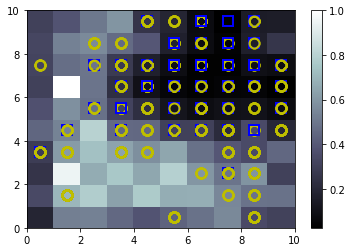

In [37]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['y', 'b']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()